# Classic Neural Networks for the MNIST Dataset
- Testing neural networks with 2 or 3 layers and different hidden layer sizes

In [1]:
%cd /opt/notebooks/basic_of_ml_image_classification

/opt/notebooks/basic_of_ml_image_classification


In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

import functions.training as my_tr
import importlib
importlib.reload(my_tr)

<module 'functions.training' from '/opt/notebooks/basic_of_ml_image_classification/functions/training.py'>

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

#load data
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

### Two layers


Testing hidden_size = 32
Training time: 31.45 s
Accuracy: 0.9592


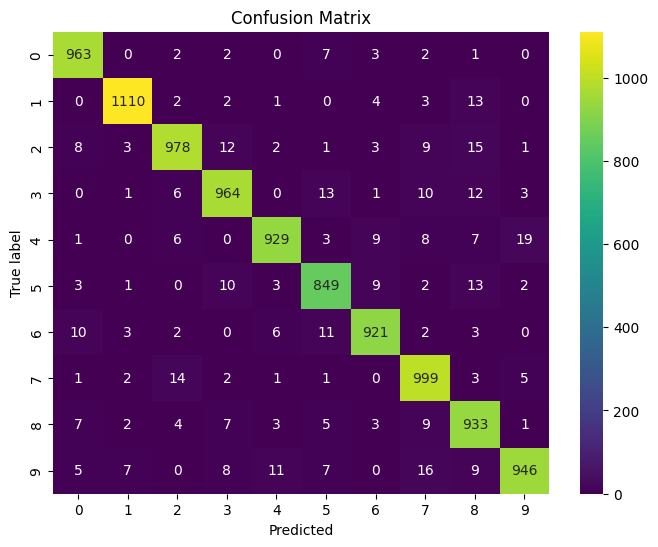


Testing hidden_size = 64
Training time: 32.18 s
Accuracy: 0.9673


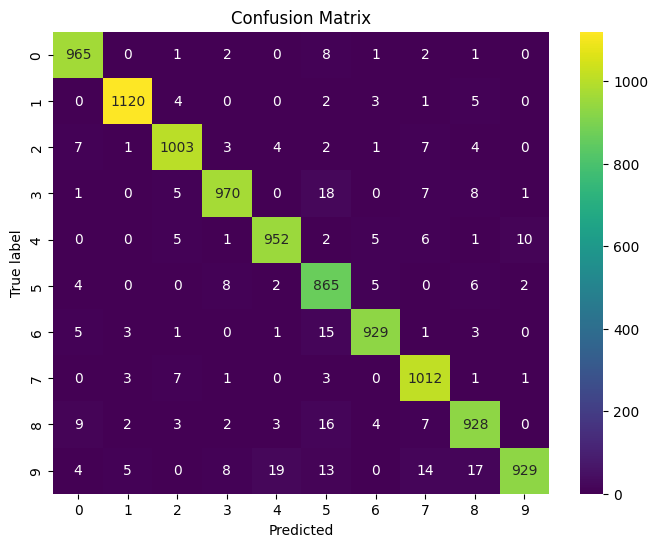


Testing hidden_size = 128
Training time: 32.57 s
Accuracy: 0.9713


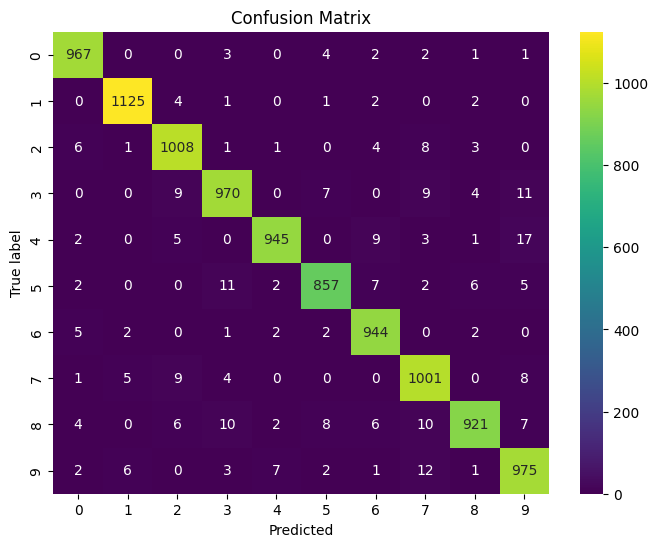


Testing hidden_size = 256
Training time: 33.38 s
Accuracy: 0.9758


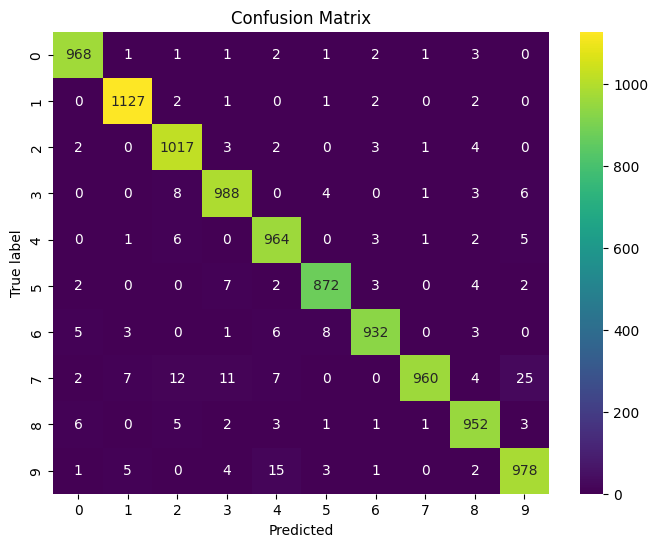

In [5]:
hidden_sizes = [32, 64, 128, 256]

results = {}

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

for h in hidden_sizes:
    print(f"\nTesting hidden_size = {h}")
    t, acc, cm = my_tr.train_model([h], train_loader, test_loader, model_name = f"two-layer_hidden-size-{h}")

    results[h] = {
        "training_time": t,
        "accuracy": acc,
        "confusion_matrix": cm
    }

    print(f"Training time: {t:.2f} s")
    print(f"Accuracy: {acc:.4f}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Predicted")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.show()

### Three layers


Testuję hidden_size = (64, 32)
Training time: 32.68 s
Accuracy: 0.9669


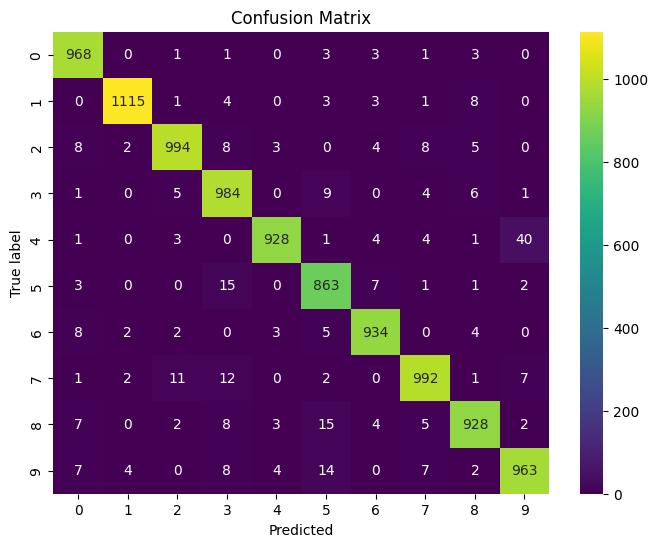


Testuję hidden_size = (128, 64)
Training time: 33.49 s
Accuracy: 0.9755


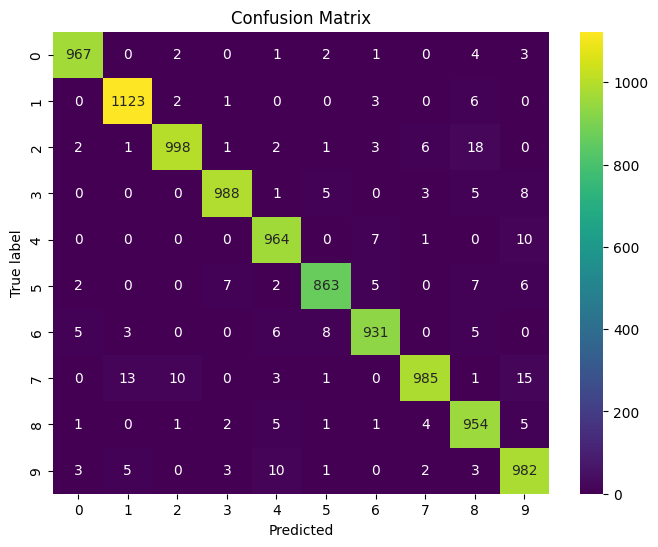


Testuję hidden_size = (256, 128)
Training time: 35.72 s
Accuracy: 0.9735


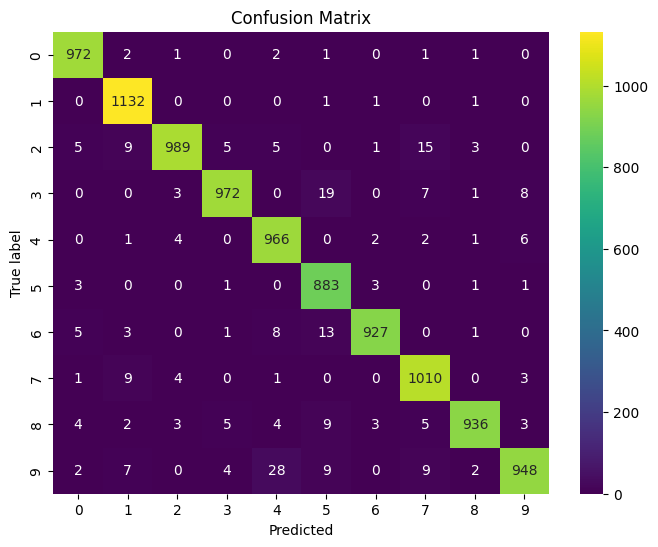


Testuję hidden_size = (512, 256)
Training time: 39.69 s
Accuracy: 0.9728


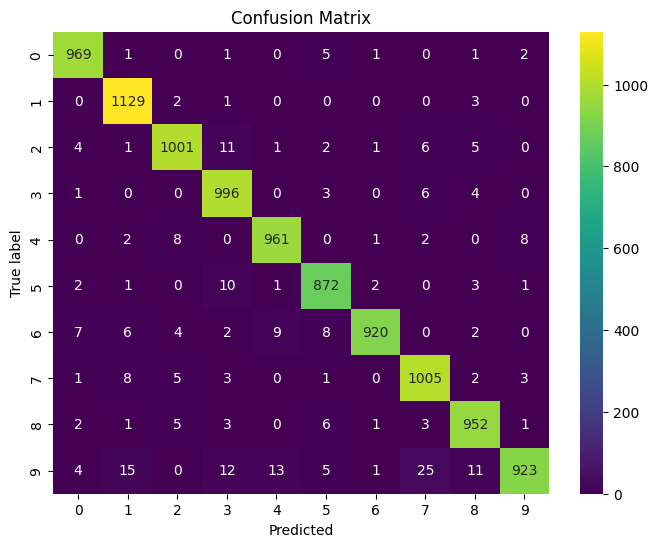

In [6]:
hidden_sizes = [(64, 32),
                (128, 64),
                (256, 128),
                (512, 256)]

results3 = {}

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

for h in hidden_sizes:
    print(f"\nTestuję hidden_size = {h}")
    t, acc, cm = my_tr.train_model(h, train_loader, test_loader,model_name = f"three-layer_hidden-size-{h[0]}-{h[1]}")

    results[h] = {
        "training_time": t,
        "accuracy": acc,
        "confusion_matrix": cm
    }

    print(f"Training time: {t:.2f} s")
    print(f"Accuracy: {acc:.4f}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Predicted")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.show()